Here I show the basic use of the simulator. To run the auction, we have to create our agents. We start with the bidders.

A SimpleBidder agent bids a value drawn from log-normal distribution whose mean is the quality of the auctioned object. The variance of the distribution can be set manually. We can also set the budget for each bidder.

In [47]:
import numpy as np

from AuctionSimulator.Agents.Bidders import SimpleBidder

n_bidders = 5

bidders = np.array([SimpleBidder(budget=10) for _ in range(n_bidders)])

We also have to create the seller and the object they want to sell. An auctioned object has its quality and quantity. High-quality objects are sold with higher probability. Here we keep the same quality for all objects. The objects are assigned to the auctioneer. We can also set the auctioneer's valuation of the objects (parameter $x_0$)

In [48]:
from AuctionSimulator.Agents.Sellers import AuctionedObject, Auctioneer

n_objects = 3

auctioned_objects = np.array([AuctionedObject(i, quantity=10) for i in range(n_objects)])
auctioneer = Auctioneer(auctioned_objects)

Now we populate the auction house.

In [49]:
from AuctionSimulator.AuctionHouse.AuctionHouse import Controller

n_rounds = 20
house = Controller(n_rounds, auctioneer, bidders)

And finally we run the auction.

In [50]:
house.run()

Now we can analyse the results. Let's start with the auction data.

In [51]:
auction_df = house.auction_tracker.make_dataframe()
auction_df.head()

,object_id,winner,winning_bid,second_bid,payment,reserve_price,fee
auction_round,,,,,,,
0,2.0,1.0,3.668749,3.153015,3.153015,0.0,0.0
1,1.0,0.0,4.362009,3.228116,3.228116,0.0,0.0
2,1.0,1.0,3.661812,2.107803,2.107803,0.0,0.0
3,1.0,2.0,8.847541,4.121145,4.121145,0.0,0.0
4,2.0,0.0,4.793205,3.728133,3.728133,0.0,0.0


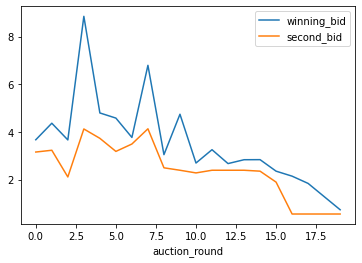

In [52]:
auction_df[['winning_bid', 'second_bid']].plot()

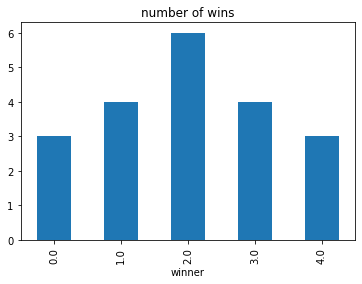

In [56]:
auction_df.groupby('winner')['object_id'].count().plot.bar(title='number of wins')

The bids seem to diminish in time. This might be caused by the limited budgets - after few rounds, the bidders spend their budgets and they are unable to bid high anymore. To find out, we can look at the bidder-level data.

In [63]:
bidder_df = house.bidder_tracker.make_dataframe(variables=['bids', 'budgets'])
bidder_df.head()

bids                                            budgets  \
                      0         1         2         3         4          0   
auction_round                                                                
0              3.134653  3.668749  1.411514  2.404994  3.153015  10.000000   
1              4.362009  3.228116  2.174895  1.259016  1.832982   6.771884   
2              1.457763  3.661812  2.107803  1.372800  1.487445   6.771884   
3              4.121145  3.005803  8.847541  2.847026  1.687380   6.771884   
4              4.793205  1.632304  2.493292  3.728133  1.908525   3.043751   

                                                
                      1          2     3     4  
auction_round                                   
0              6.846985  10.000000  10.0  10.0  
1              6.846985  10.000000  10.0  10.0  
2              4.739183  10.000000  10.0  10.0  
3              4.739183   5.878855  10.0  10.0  
4              4.739183   5.878855  10.0  10.0

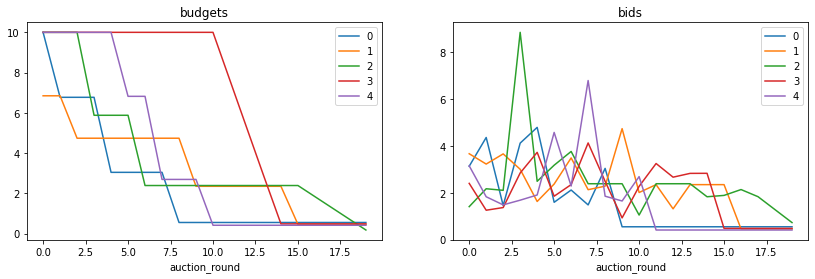

In [69]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
bidder_df['budgets'].plot(ax=ax1, title='budgets')
bidder_df['bids'].plot(ax=ax2, title='bids')

One can see that the budgets deplete pretty early and the bids drop as a consequence. If the auction house owner wanted to prevent this, they can use throttling to plan the budget spending dynamics. We will look at throttling later on.